In [1]:
%matplotlib inline
import matplotlib.pylab as plt

from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import pandas as pd
import numpy as np

In [2]:
from tsfresh.examples.har_dataset import download_har_dataset, load_har_dataset, load_har_classes

# fetch dataset from uci
download_har_dataset()

In [3]:
df = load_har_dataset()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.000181,0.010139,0.009276,0.005066,0.010810,0.004045,0.004757,0.006214,0.003307,0.007572,...,0.001412,-0.001509,0.000060,0.000435,-0.000819,0.000228,-0.000300,-0.001147,-0.000222,0.001576
1,0.001094,0.004550,0.002879,0.002247,0.003305,0.002416,0.001619,0.000981,0.000009,-0.000363,...,-0.000104,-0.000141,0.001333,0.001541,0.001077,-0.000736,-0.003767,-0.004646,-0.002941,-0.001599
2,0.003531,0.002285,-0.000420,-0.003738,-0.006706,-0.003148,0.000733,0.000668,0.002162,-0.000946,...,0.000661,0.001853,-0.000268,-0.000394,-0.000279,-0.000316,0.000144,0.001246,0.003117,0.002178
3,-0.001772,-0.001311,0.000388,0.000408,-0.000355,0.000998,0.001109,-0.003149,-0.008882,-0.010483,...,0.000458,0.002103,0.001358,0.000820,-0.000212,-0.001915,-0.001631,-0.000867,-0.001172,-0.000028
4,0.000087,-0.000272,0.001022,0.003126,0.002284,0.000885,0.001933,0.002270,0.002247,0.002175,...,0.002529,0.003518,-0.000248,-0.002761,0.000252,0.003752,0.001626,-0.000698,-0.001223,-0.003328


In [4]:
y = load_har_classes()

In [5]:
df["id"] = df.index
df = df.melt(id_vars="id", var_name="time").sort_values(["id", "time"]).reset_index(drop=True)

In [6]:
df.head()

,id,time,value
0,0,0,0.000181
1,0,1,0.010139
2,0,2,0.009276
3,0,3,0.005066
4,0,4,0.010810


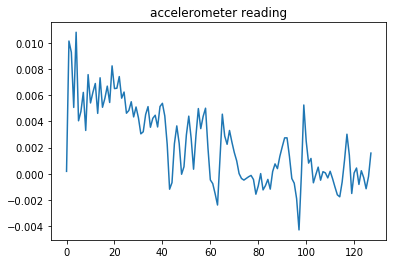

In [7]:
plt.title('accelerometer reading')
plt.plot(df[df["id"] == 0].set_index("time").value)
plt.show()

In [8]:
X = extract_features(df[df["id"] < 500], column_id="id", column_sort="time", impute_function=impute)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 10/10 [00:54<00:00,  5.40s/it]


In [13]:
X

variable,value__abs_energy,value__absolute_sum_of_changes,"value__agg_autocorrelation__f_agg_""mean""__maxlag_40","value__agg_autocorrelation__f_agg_""median""__maxlag_40","value__agg_autocorrelation__f_agg_""var""__maxlag_40","value__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""max""","value__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""mean""","value__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""min""","value__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""var""","value__agg_linear_trend__attr_""intercept""__chunk_len_50__f_agg_""max""",...,value__symmetry_looking__r_0.9500000000000001,value__time_reversal_asymmetry_statistic__lag_1,value__time_reversal_asymmetry_statistic__lag_2,value__time_reversal_asymmetry_statistic__lag_3,value__value_count__value_-1,value__value_count__value_0,value__value_count__value_1,value__variance,value__variance_larger_than_standard_deviation,value__variation_coefficient
id,,,,,,,,,,,,,,,,,,,,,
0,0.001766,0.182234,0.385871,0.369068,0.032822,0.008461,0.005782,0.002635,4.097548e-06,0.010256,...,1.0,-2.848871e-09,-8.289268e-09,-1.655787e-08,0.0,0.0,0.0,0.000009,0.0,1.296355
1,0.000506,0.167999,-0.008718,-0.004493,0.022767,0.002734,0.000468,-0.002041,2.192703e-06,0.004748,...,1.0,-5.877318e-10,-1.922393e-09,-4.718608e-10,0.0,0.0,0.0,0.000004,0.0,11.401648
2,0.001106,0.231978,-0.005203,-0.016122,0.026357,0.002620,-0.000484,-0.004855,6.160555e-06,0.005516,...,1.0,4.335730e-12,-3.074296e-09,-1.131423e-08,0.0,0.0,0.0,0.000008,0.0,6.793774
3,0.000932,0.186693,0.040150,0.033541,0.035531,0.005630,0.001070,-0.004364,1.142653e-05,0.007497,...,1.0,-1.191508e-10,-3.875581e-09,-1.225939e-08,0.0,0.0,0.0,0.000007,0.0,8.130959
4,0.000525,0.154255,-0.009908,-0.035693,0.028350,0.001293,0.000065,-0.001247,4.064472e-07,0.003863,...,1.0,8.025438e-11,1.392431e-09,4.529091e-09,0.0,0.0,0.0,0.000004,0.0,-10.327243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,5.163424,6.861902,0.069765,0.121328,0.234982,0.200007,0.024016,-0.133884,1.611886e-02,0.484052,...,1.0,-3.350280e-04,-2.477597e-04,-1.160635e-04,0.0,0.0,0.0,0.040056,0.0,11.882413
496,4.841376,6.123019,0.014084,-0.079531,0.262156,0.219919,0.007838,-0.125847,1.313378e-02,0.422304,...,1.0,4.642438e-04,5.436171e-04,5.422821e-04,0.0,0.0,0.0,0.037561,0.0,11.969660
497,6.456917,7.589166,0.063291,0.100480,0.240536,0.194170,-0.025603,-0.293501,2.653670e-02,0.372580,...,1.0,1.047217e-03,7.930836e-04,8.417560e-04,0.0,0.0,0.0,0.049983,0.0,-10.404978


In [14]:
y[:500]

0      5
1      5
2      5
3      5
4      5
      ..
495    2
496    2
497    2
498    2
499    2
Name: 0, Length: 500, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y[:500], test_size=.2)

In [12]:
classifier_full = DecisionTreeClassifier()
classifier_full.fit(X_train, y_train)
print(classification_report(y_test, classifier_full.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      0.96      0.98        26
           2       0.93      1.00      0.96        13
           3       1.00      1.00      1.00        18
           4       0.33      0.23      0.27        13
           5       0.47      0.69      0.56        13
           6       0.67      0.59      0.62        17

    accuracy                           0.78       100
   macro avg       0.73      0.75      0.73       100
weighted avg       0.78      0.78      0.77       100

